In [1]:
# 패키지 임포트 
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [2]:
norm = stats.norm(loc=70, scale=10)

In [3]:
s_x = np.linspace(-10,150,2000)
s_pdf = norm.pdf(s_x)

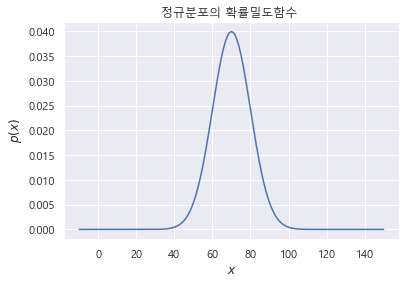

In [4]:
plt.plot(s_x, s_pdf)
plt.plot(s_x, s_cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [5]:
s_cdf = norm.cdf(s_x)

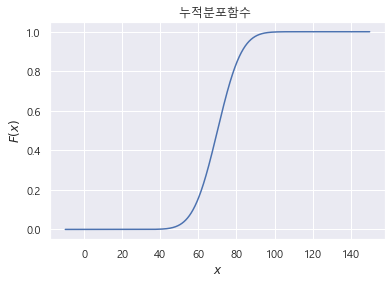

In [6]:
plt.plot(s_x, s_cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [7]:
stan_norm = stats.norm(loc=0, scale=1)
sn_x = np.linspace(-5,5,1000)

sn_pdf = stan_norm.pdf(sn_x)

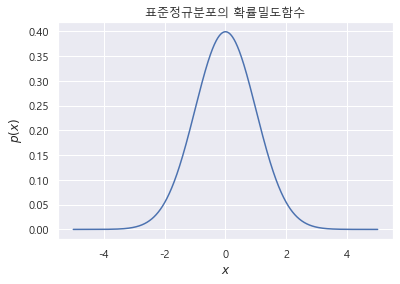

In [18]:
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [19]:
n_data = np.random.randint(1,100,size=1000)
n_data = np.sort(n_data)

In [20]:
n_data.shape

(1000,)

In [21]:
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 50.722
standard deviation: 28.960675337429546


In [22]:
norm_n_data = stats.norm(loc = n_mean, scale = n_std)
n_pdf = norm_n_data.pdf(n_data)

In [23]:
n_data.shape

(1000,)

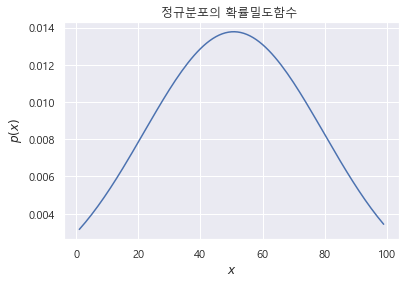

In [24]:
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [25]:
z_data = list(n_data)
z_data_list = [] 

for i in z_data:
    z = (i - n_mean) / n_std 
    z_data_list.append(z) 

In [26]:
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

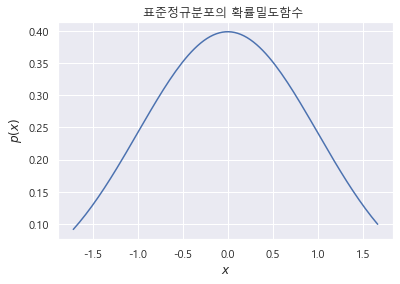

In [27]:
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

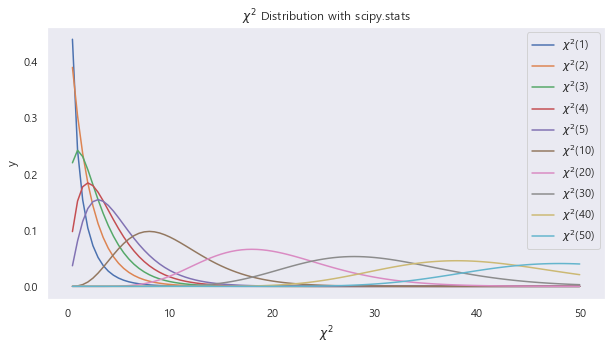

In [30]:
from scipy.stats import chi2
Chi_x = np.linspace(0.5, 50, 100)

plt.figure(figsize=(10, 5))          
for dof in [1,2,3,4,5,10,20,30,40,50] :  
    plt.plot(Chi_x, stats.chi2(dof).pdf(Chi_x),
             label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')              
plt.ylabel("y")                     
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')  
plt.legend()                        
plt.show()                         

In [32]:
x_o = [324, 78, 261]
x_e = [371, 80, 212]

x_crosstab = pd.DataFrame([x_o, x_e], 
                          columns = ['서울','인천','대구'],
                          index = ['관찰도수', '기대도수'])

In [33]:
x_crosstab

서울  인천   대구
관찰도수  324  78  261
기대도수  371  80  212

In [35]:
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

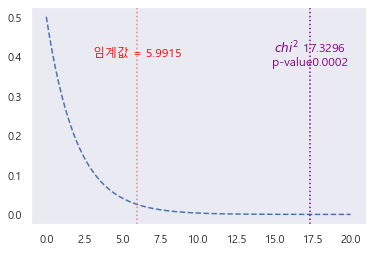

In [39]:
from scipy.stats import chi2 
dof=2
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)


x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')


plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
        horizontalalignment='center',color='red')


plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0],.4,r'$chi^2$ ' + str(round(result[0],4)),va='bottom',horizontalalignment='center',color='purple')
plt.text(result[0],.4,'p-value' + str(round(result[1],4)),va='top',horizontalalignment='center',color='purple')
plt.grid()
plt.show()
